# Telecom X parte 2 Prediccion de cancelacion  

 # Objetivos

*  preparar los datos (tratamiento, codificacion, normalizacion)
*  Realizar analisis de correlacion y seleccion de variables
*  Entrenar modelos de clasificacion
*  Evaluar el rendimiento de los modelos con métricas.
*  Interpretar los resultados, incluyendo la importancia de las variables.
*  Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.





# Importacion de Bibliotecas

In [376]:
# ========================================
#  Importación de Librerías
# ========================================

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Balanceo de clases
from imblearn.over_sampling import SMOTE

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [377]:
!pip install imbalanced-learn

In [378]:
!pip install scikit-learn

# Importando CSV

In [379]:
df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


# Verificacion de columnas y tipo de Variantes

In [380]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

#Preparacion de los Datos


## Eliminación de Columnas Irrelevantes


In [382]:
# ===============================
#  PASO 2: ELIMINACIÓN DE COLUMNAS IRRELEVANTES
# ===============================

import pandas as pd

# Cargar el archivo CSV tratado
df = pd.read_csv("df_limpo.csv")

# Verificar nombres de columnas
print(" Columnas originales:\n")
print(df.columns)

# Ejemplo: eliminar columnas irrelevantes
# Aquí coloco ejemplos comunes, ajustaremos después según tu dataset real
columnas_a_eliminar = ["customerID", "Unnamed: 0"]  # <-- Ajustar a lo que realmente tenga tu CSV

# Verificar si existen en el dataframe antes de eliminarlas
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]

# Eliminar columnas irrelevantes
df.drop(columns=columnas_existentes, inplace=True)

print("\n Columnas eliminadas:", columnas_existentes)
print("\n Columnas restantes:\n", df.columns)
print("\n Dimensiones actuales:", df.shape)


 Columnas originales:

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

 Columnas eliminadas: ['customerID']

 Columnas restantes:
 Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'in

##Encoding

In [386]:
# ================================
#  Paso 3: Encoding de variables categóricas
# ================================

# 1. Identificar las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("Columnas categóricas encontradas:", list(cat_cols))

# 2. Aplicar One-Hot Encoding
#    drop_first=True elimina una categoría de referencia para evitar multicolinealidad
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3. Verificar dimensiones y primeras filas
print("\nDimensiones después del encoding:", df_encoded.shape)
df_encoded.head()


Columnas categóricas encontradas: ['customerID', 'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

Dimensiones después del encoding: (7043, 7074)


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,False,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True


##Verificación de la Proporción de Cancelación (Churn)

 Columnas disponibles:
 Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

📊 Conteo de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

📈 Proporción de Churn (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


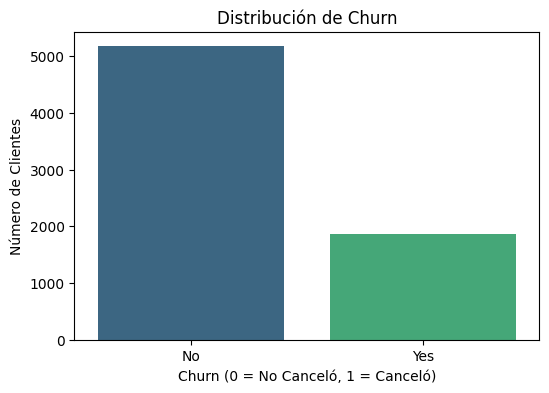

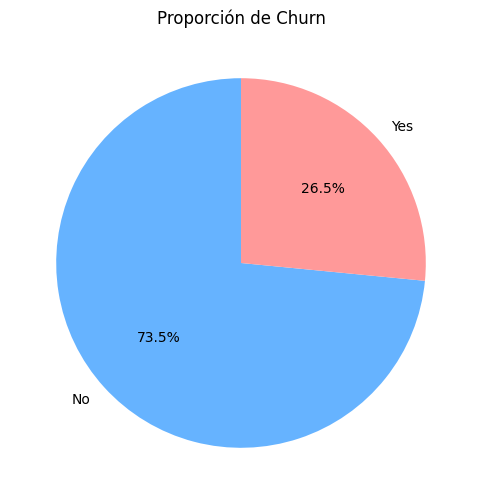

In [385]:
# ===============================
#  PASO 4: VERIFICACIÓN DE LA PROPORCIÓN DE CHURN
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV tratado (ya limpio)
df = pd.read_csv("df_limpo.csv")

# Verificar si la columna 'Churn' existe (ajustamos el nombre si es diferente)
print(" Columnas disponibles:\n", df.columns)

# Si la columna no se llama 'Churn', cambia aquí el nombre correcto
columna_churn = "Churn"  # <-- Ajustar si tu CSV usa otro nombre

# Conteo de clientes que cancelaron vs. permanecen
conteo_churn = df[columna_churn].value_counts()
proporcion_churn = df[columna_churn].value_counts(normalize=True) * 100

print("\n📊 Conteo de Churn:")
print(conteo_churn)
print("\n📈 Proporción de Churn (%):")
print(proporcion_churn)

#  Visualización con gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette="viridis")
plt.title("Distribución de Churn")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Número de Clientes")
plt.show()

#  Visualización con gráfico circular
plt.figure(figsize=(6,6))
plt.pie(conteo_churn, labels=conteo_churn.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999"])
plt.title("Proporción de Churn")
plt.show()


 ##BALANCEO DE CLASES CON SMOTE

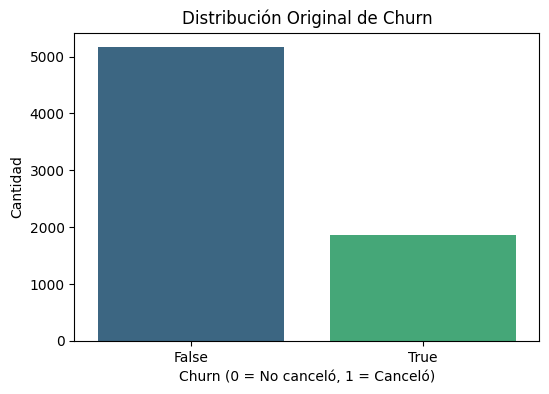


 Distribución antes del balanceo:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64


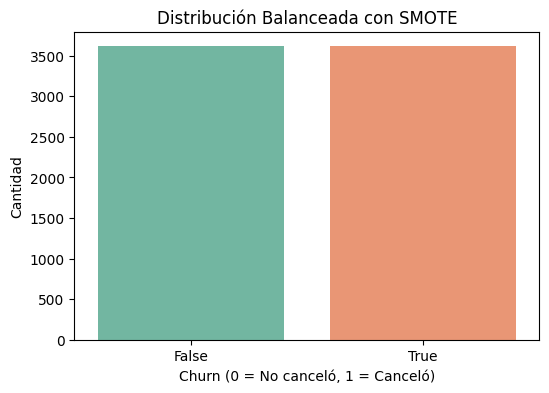


 Distribución después del balanceo:
Churn_Yes
True     3614
False    3614
Name: count, dtype: int64

 Balanceo completado.


In [389]:
# =====================================
#  PASO 5: BALANCEO DE CLASES CON SMOTE
# =====================================

# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 2. Cargar el dataset limpio
df = pd.read_csv("df_limpo.csv")

# 3. Eliminar columnas irrelevantes como IDs (que no ayudan a predecir churn)
#  Ajusta el nombre si tu dataset tiene otra columna identificadora
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# Handle NaNs before encoding or splitting
if 'Total.Day' in df.columns:
    df = df.dropna(subset=['Total.Day', 'account.Charges.Total']) # Assuming these are the columns with NaNs


# 4. One-Hot Encoding → convertir columnas categóricas en variables numéricas
# Ensure 'Churn' is treated as categorical for encoding
df_encoded = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'], drop_first=True)

# 5. Definir variable objetivo y características
# Use the correct column name after one-hot encoding for Churn
columna_churn_encoded = "Churn_Yes"  # This is the name after one-hot encoding with drop_first=True

if columna_churn_encoded in df_encoded.columns:
    X = df_encoded.drop(columns=[columna_churn_encoded])
    y = df_encoded[columna_churn_encoded]

    # 6. Ver distribución original de churn
    plt.figure(figsize=(6,4))
    sns.countplot(x=y, palette="viridis")
    plt.title("Distribución Original de Churn")
    plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
    plt.ylabel("Cantidad")
    plt.show()

    print("\n Distribución antes del balanceo:")
    print(y.value_counts())

    # 7. Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 8. Aplicar SMOTE en el conjunto de entrenamiento
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    # 9. Verificar nueva distribución balanceada
    plt.figure(figsize=(6,4))
    sns.countplot(x=y_train_bal, palette="Set2")
    plt.title("Distribución Balanceada con SMOTE")
    plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
    plt.ylabel("Cantidad")
    plt.show()

    print("\n Distribución después del balanceo:")
    print(y_train_bal.value_counts())

    # 10. Exportar los datasets balanceados (opcional)
    # X_train_bal.to_csv("X_train_balanceado.csv", index=False, encoding='utf-8-sig')
    # y_train_bal.to_csv("y_train_balanceado.csv", index=False, encoding='utf-8-sig')

    print("\n Balanceo completado.")

else:
    print(f"Error: La columna '{columna_churn_encoded}' no se encontró después de la codificación.")

##NORMALIZACIÓN / ESTANDARIZACIÓN DE LOS DATOS

In [390]:
# =====================================
#  PASO 6: NORMALIZACIÓN / ESTANDARIZACIÓN DE LOS DATOS
# =====================================

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Cargar el dataset limpio
df = pd.read_csv("df_limpo.csv")

# 2. Eliminar columnas irrelevantes si aún existen
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# Handle NaNs before encoding or splitting
if 'Total.Day' in df.columns:
    df = df.dropna(subset=['Total.Day', 'account.Charges.Total']) # Assuming these are the columns with NaNs


# 3. Codificar variables categóricas antes de escalar
df_encoded = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'], drop_first=True)


# 4. Definir variable objetivo y características
columna_churn_encoded = "Churn_Yes"  # Adjust to the correct encoded column name
X = df_encoded.drop(columns=[columna_churn_encoded])
y = df_encoded[columna_churn_encoded]

# 5. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Crear el escalador
scaler = StandardScaler()

# 7. Ajustar el escalador SOLO con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# 8. Transformar también los datos de prueba
X_test_scaled = scaler.transform(X_test)

# 9. Convertir los arrays a DataFrames para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 10. Mostrar resultados
print(" Datos estandarizados correctamente.\n")
print(" Primeras filas de los datos normalizados:")
display(X_train_scaled.head())

 Datos estandarizados correctamente.

 Primeras filas de los datos normalizados:


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.436924,-0.628770,0.805962,0.922832,-0.338930,0.999594,1.031793,1.510408,0.329482,-0.329482,...,-0.529249,1.262784,-0.529249,1.244564,-0.513173,-0.570312,0.81622,-0.522953,1.412706,-0.551531
1,-0.436924,0.667450,-1.514253,-1.480460,-0.598522,-1.000406,1.031793,-0.662073,0.329482,-0.329482,...,1.889471,-0.791901,1.889471,-0.803495,1.948659,-0.570312,0.81622,-0.522953,-0.707861,-0.551531
2,-0.436924,-1.033839,-1.425014,-1.470516,-0.937264,-1.000406,-0.969186,-0.662073,0.329482,-0.329482,...,1.889471,-0.791901,1.889471,-0.803495,-0.513173,-0.570312,-1.22516,-0.522953,-0.707861,1.813134
3,2.288728,0.869984,0.875370,0.839960,1.159293,0.999594,-0.969186,-0.662073,0.329482,-0.329482,...,-0.529249,-0.791901,-0.529249,1.244564,-0.513173,-0.570312,0.81622,-0.522953,1.412706,-0.551531
4,-0.436924,1.518094,1.281903,1.302386,2.175890,0.999594,-0.969186,-0.662073,0.329482,-0.329482,...,-0.529249,1.262784,-0.529249,1.244564,-0.513173,1.753426,0.81622,1.912217,-0.707861,-0.551531


#Correlación y Selección de Variables

##Análisis de Correlación

✅ Usando la columna objetivo: Churn_Yes


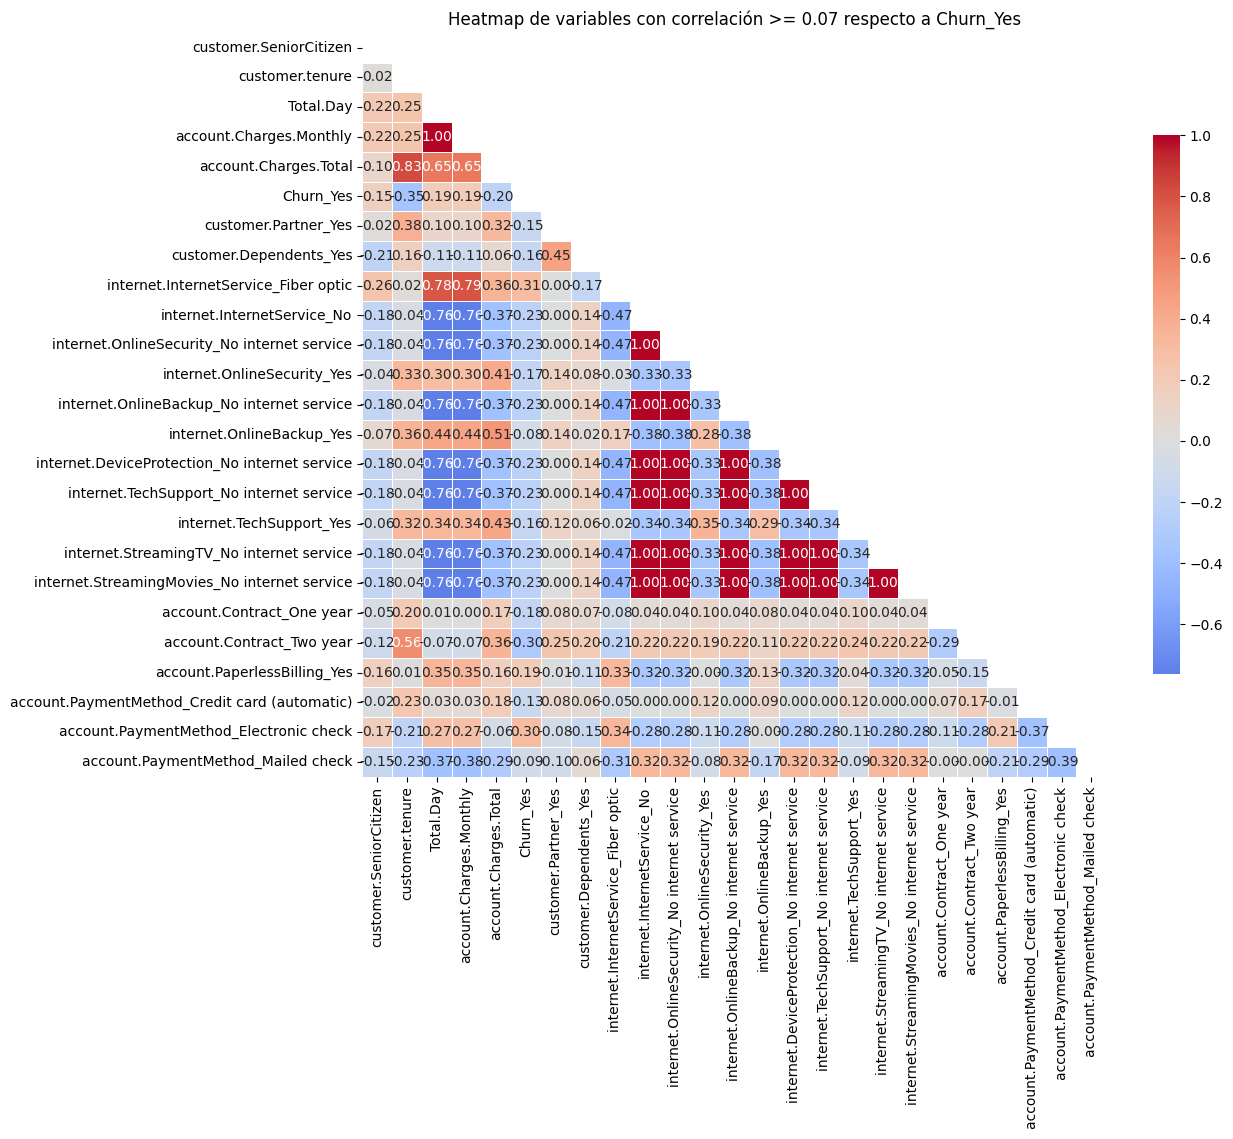

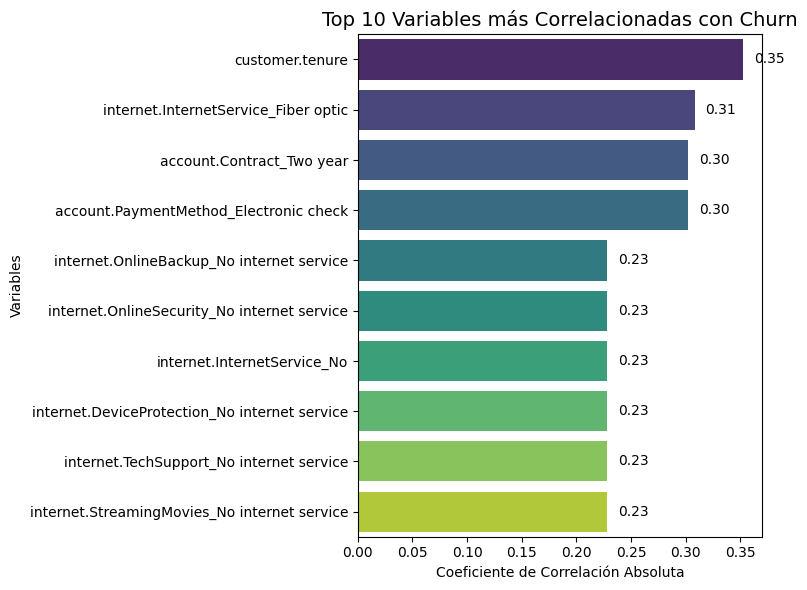

In [391]:
# ============================================
#  PASO 1: ANÁLISIS DE CORRELACIÓN + TOP 10 VARIABLES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset limpio
df = pd.read_csv("df_limpo.csv")

# 2. Eliminar columnas irrelevantes como IDs
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# 3. Convertir variables categóricas a numéricas para correlación
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Detección automática de la columna objetivo (Churn)
columna_churn = None
for col in df_encoded.columns:
    if "churn" in col.lower() or "cancel" in col.lower():
        columna_churn = col
        break

if columna_churn is None:
    raise ValueError(" No se encontró una columna objetivo relacionada con churn o cancelación.")
else:
    print(f" Usando la columna objetivo: {columna_churn}")

# 5. Calcular la matriz de correlación
corr = df_encoded.corr()

# 6. Definir umbral para filtrar correlaciones relevantes
limiar = 0.07

# 7. Seleccionar variables relevantes
variables_relevantes = corr.index[abs(corr[columna_churn]) >= limiar].tolist()

# Asegurar que la variable objetivo esté incluida
if columna_churn not in variables_relevantes:
    variables_relevantes.append(columna_churn)

# 8. Crear matriz de correlación filtrada
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# 9. Crear máscara para mostrar solo la mitad superior
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# 10. Graficar heatmap con anotaciones
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} respecto a {columna_churn}')
plt.show()

# ============================================================
# TOP 10 VARIABLES MÁS CORRELACIONADAS CON CHURN
# ============================================================

# 11. Obtener correlación absoluta ordenada de mayor a menor
top_corr = corr[columna_churn].drop(columna_churn).abs().sort_values(ascending=False).head(10)

# 12. Graficar las 10 variables más correlacionadas con Churn
plt.figure(figsize=(8,6))
barplot = sns.barplot(
    x=top_corr.values,
    y=top_corr.index,
    palette="viridis"
)

# Anotar valores en las barras
for index, value in enumerate(top_corr.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.title("Top 10 Variables más Correlacionadas con Churn", fontsize=14)
plt.xlabel("Coeficiente de Correlación Absoluta")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


## Analisis Dirigido

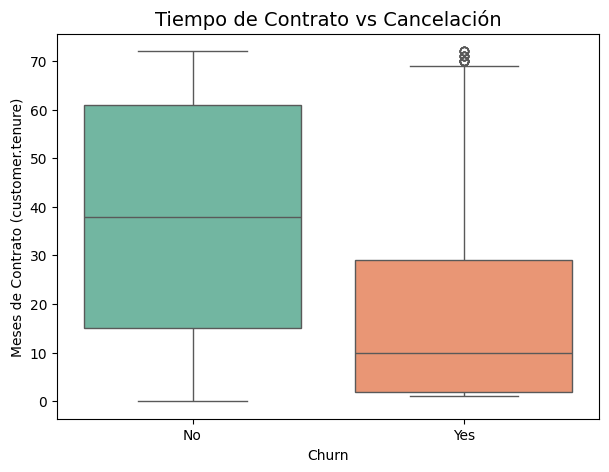

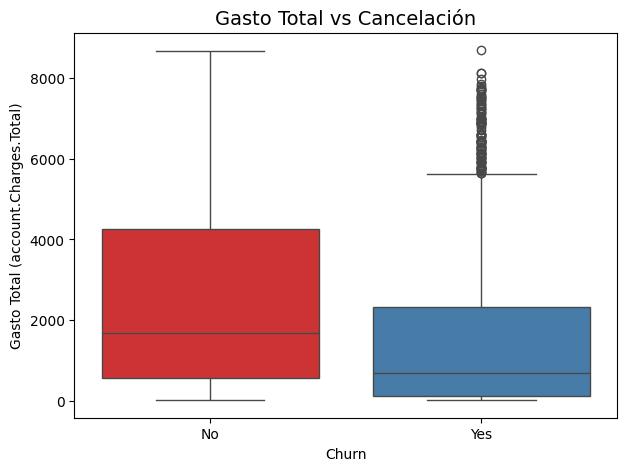

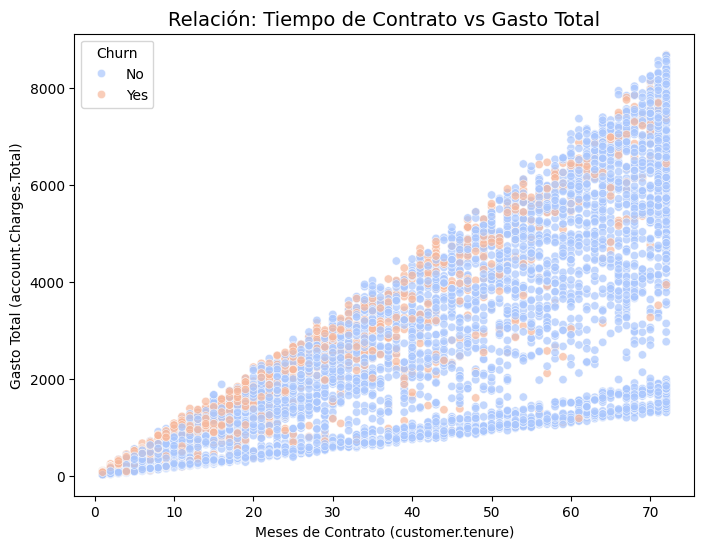

In [393]:
# ============================================
#  PASO 2: ANÁLISIS DIRIGIDO DE VARIABLES
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset limpio
df = pd.read_csv("df_limpo.csv")

# 2. Eliminar columnas irrelevantes como IDs si existen
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# 3. Verificar que la columna objetivo se llame "Churn"
columna_churn = "Churn"  # Ajustar si tiene otro nombre

# ============================================
# A) Tiempo de contrato vs Cancelación
# ============================================
plt.figure(figsize=(7,5))
sns.boxplot(x=columna_churn, y="customer.tenure", data=df, palette="Set2")
plt.title("Tiempo de Contrato vs Cancelación", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato (customer.tenure)")
plt.show()

# ============================================
# B) Gasto total vs Cancelación
# ============================================
if "account.Charges.Total" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=columna_churn, y="account.Charges.Total", data=df, palette="Set1")
    plt.title("Gasto Total vs Cancelación", fontsize=14)
    plt.xlabel("Churn")
    plt.ylabel("Gasto Total (account.Charges.Total)")
    plt.show()
else:
    print(" La columna 'account.Charges.Total' no existe en el dataset.")

# ============================================
# C) Scatter Plot — Tiempo de Contrato vs Gasto Total
# ============================================
if "account.Charges.Total" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue=columna_churn, data=df, palette="coolwarm", alpha=0.7)
    plt.title("Relación: Tiempo de Contrato vs Gasto Total", fontsize=14)
    plt.xlabel("Meses de Contrato (customer.tenure)")
    plt.ylabel("Gasto Total (account.Charges.Total)")
    plt.legend(title="Churn", loc="upper left")
    plt.show()

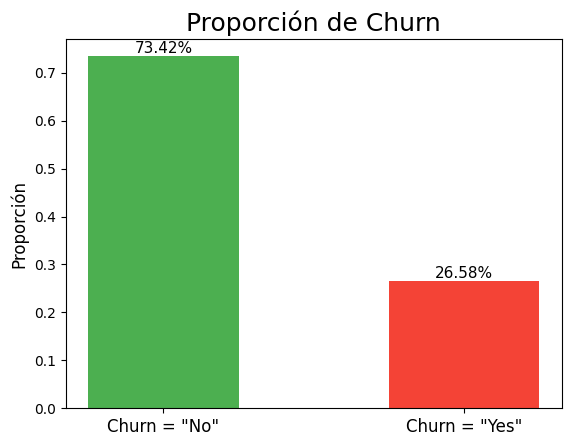

In [394]:
import matplotlib.pyplot as plt

# Proporción de clientes que hicieron churn o no
proporcion_churn = df_encode['Churn_Yes'].value_counts(normalize=True).reset_index()
proporcion_churn.columns = ['Churn', 'proportion']

# Gráfico de barras verticales
fig, ax = plt.subplots()

bars = ax.bar(proporcion_churn['Churn'], proporcion_churn['proportion'],
              color=['#4CAF50', '#F44336'], width=0.5)

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11)

# Títulos y ejes
ax.set_xticks([0, 1])
ax.set_xticklabels(['Churn = "No"', 'Churn = "Yes"'], fontsize=12)
ax.set_ylabel("Proporción", fontsize=12)
ax.set_title("Proporción de Churn", fontsize=18)

plt.show()


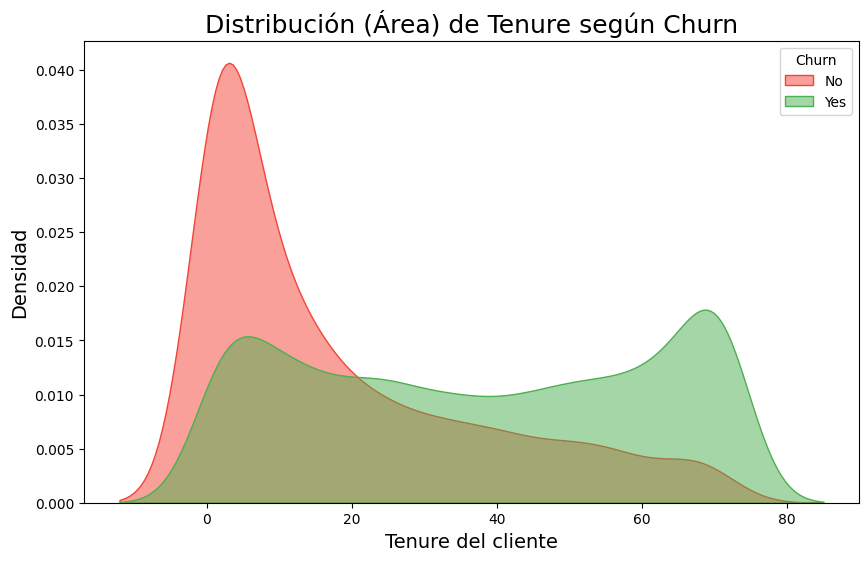

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

# Area chart (densidad de tenure según churn)
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df_encode,
            x='customer.tenure',
            hue='Churn_Yes',
            fill=True,
            common_norm=False,
            alpha=0.5,
            palette=['#4CAF50', '#F44336'],
            ax=ax)

# Personalización
ax.set_xlabel("Tenure del cliente", fontsize=14)
ax.set_ylabel("Densidad", fontsize=14)
ax.set_title("Distribución (Área) de Tenure según Churn", fontsize=18)
ax.legend(title="Churn", labels=['No', 'Yes'])

plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Area chart (densidad de cargos mensuales según churn)
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(data=df_encode,
            x='account.Charges.Monthly',
            hue='Churn_Yes',
            fill=True,
            common_norm=False,
            alpha=0.5,
            palette=['#4CAF50', '#F44336'],
            ax=ax)

# Personalización
ax.set_xlabel("Cargos Mensuales", fontsize=14)
ax.set_ylabel("Densidad", fontsize=14)
ax.set_title("Distribución (Área) de Cargos Mensuales según Churn", fontsize=18)
ax.legend(title="Churn", labels=['No', 'Yes'])

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Area chart (densidad de cargos totales según churn)
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(data=df_encode,
            x='account.Charges.Total',
            hue='Churn_Yes',
            fill=True,
            common_norm=False,
            alpha=0.5,
            palette=['#4CAF50', '#F44336'],
            ax=ax)

# Personalización
ax.set_xlabel("Cargos Totales", fontsize=14)
ax.set_ylabel("Densidad", fontsize=14)
ax.set_title("Distribución (Área) de Cargos Totales según Churn", fontsize=18)
ax.legend(title="Churn", labels=['No', 'Yes'])

plt.show()


#Modelado predictivo

In [396]:
# ================================================
# Imports y configuración base para modelado
# ================================================
import pandas as pd
import numpy as np

# (Opcional) visualización
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn: split, preprocesamiento, métricas y modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Modelos (uno con normalización y otro sin)
from sklearn.linear_model import LogisticRegression        # sensible a escala
from sklearn.neighbors import KNeighborsClassifier         # sensible a escala
from sklearn.tree import DecisionTreeClassifier            # no sensible a escala
from sklearn.ensemble import RandomForestClassifier        # no sensible a escala

# ================================================
# Cargar datos
# ================================================
CSV_PATH = "df_limpo.csv"   # cambia la ruta si corresponde
df = pd.read_csv(CSV_PATH)

print("Dimensiones:", df.shape)
print("Columnas:", list(df.columns)[:10], "...")

# ================================================
#  Preparación mínima de la variable objetivo
#    (normaliza Churn a 0/1 sin tocar el resto de datos)
# ================================================
if df["Churn"].dtype != np.int64 and df["Churn"].dtype != np.int32:
    df["Churn"] = (
        df["Churn"].astype(str).str.strip().str.lower()
        .map({"yes": 1, "si": 1, "true": 1, "1": 1,
              "no": 0, "n": 0, "false": 0, "0": 0})
        .fillna(df["Churn"].mode()[0])
    )
df["Churn"] = df["Churn"].astype(int)

# ================================================
# Definir X (features) e y (target)
# ================================================
y = df["Churn"]
X = df.drop(columns=["Churn"])

# (Opcional) quitar IDs si existen
id_cols = [c for c in X.columns if "id" in c.lower()]
if id_cols:
    X = X.drop(columns=id_cols)

# ================================================
# Detectar tipos (numéricas vs categóricas)
#    (esto lo usaremos luego para el preprocesamiento)
# ================================================
numeric_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print(f"Numéricas ({len(numeric_cols)}):", numeric_cols[:8], "...")
print(f"Categóricas ({len(categorical_cols)}):", categorical_cols[:8], "...")


Dimensiones: (7043, 22)
Columnas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService'] ...
Numéricas (5): ['customer.SeniorCitizen', 'customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total'] ...
Categóricas (15): ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup'] ...


##Separacion de datos

In [397]:
# ================================================
# Separación de datos (70% train, 30% test)
# ================================================

# Drop rows with NaN in 'Total.Day' and 'account.Charges.Total' before splitting
X = X.dropna(subset=['Total.Day', 'account.Charges.Total'])
y = y[X.index] # Ensure y is also filtered to match the dropped rows in X


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% prueba
    random_state=42,    # para reproducibilidad
    stratify=y          # mantiene la proporción de clases
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)
print("Proporción clases en train:")
print(y_train.value_counts(normalize=True))
print("Proporción clases en test:")
print(y_test.value_counts(normalize=True))

Tamaño entrenamiento: (4922, 20)
Tamaño prueba: (2110, 20)
Proporción clases en train:
Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64
Proporción clases en test:
Churn
0    0.734123
1    0.265877
Name: proportion, dtype: float64


## creacion de modelos

In [398]:
from sklearn.impute import SimpleImputer

# Identificar variables categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Preprocesamiento para Regresión Logística
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),   # imputar NaN con media
            ('scaler', StandardScaler())                   # escalar
        ]), num_cols),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # imputar con moda
            ('encoder', OneHotEncoder(handle_unknown='ignore'))    # one-hot encoding
        ]), cat_cols)
    ]
)

# ========================
# Modelo 1: Regresión Logística
# ========================
modelo_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

modelo_log.fit(X_train, y_train)

# ========================
# Modelo 2: Random Forest
# ========================
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean'))   # imputar NaN con media
        ]), num_cols),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # imputar con moda
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

modelo_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

modelo_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(han...
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object'))])),
                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))])

## Evaluacion de modelos


📊 Resultados para Regresión Logística:
Accuracy: 0.8033
Precision: 0.6587
Recall: 0.5401
F1-score: 0.5935

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



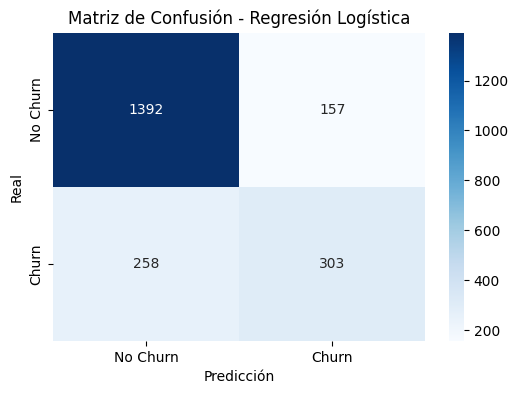


📊 Resultados para Random Forest:
Accuracy: 0.7848
Precision: 0.6241
Recall: 0.4795
F1-score: 0.5423

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



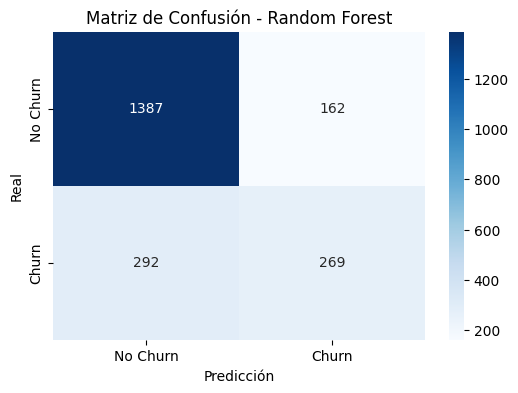

In [399]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(modelo, X_test, y_test, nombre):
    # Predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'\n📊 Resultados para {nombre}:')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(modelo_log, X_test, y_test, 'Regresión Logística')

# Evaluar Random Forest
evaluar_modelo(modelo_rf, X_test, y_test, 'Random Forest')


#Interpretación y Conclusiones

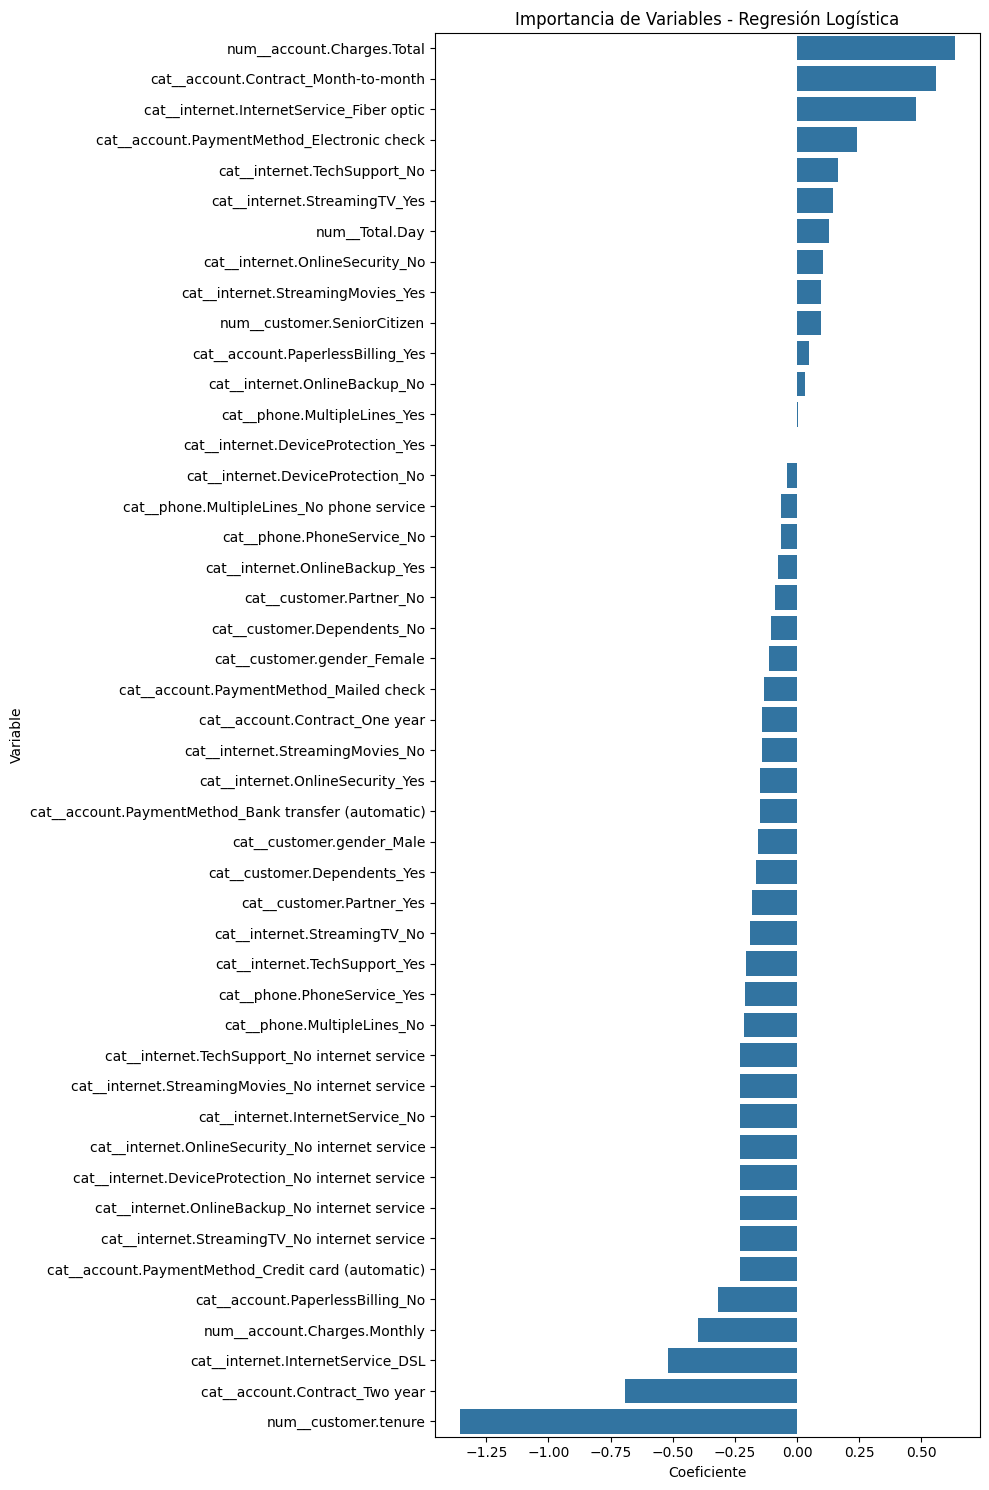

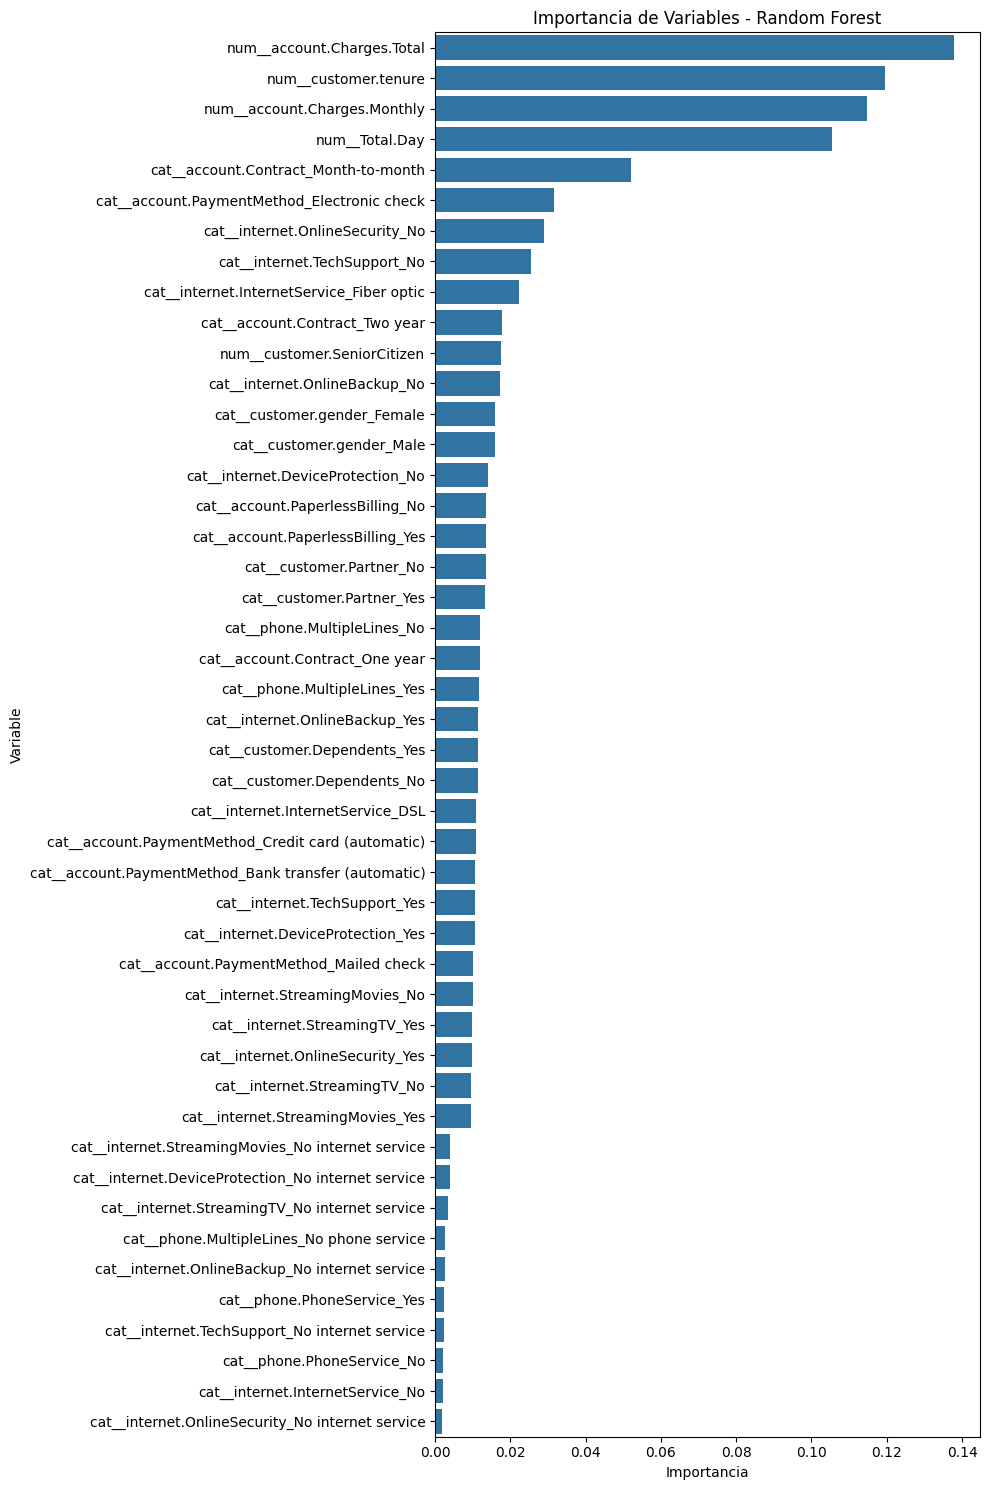

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Obtener los nombres de las características después del preprocesamiento
# Usaremos el preprocessor de la pipeline de Regresión Logística (preprocessor_scaled)
# ya que incluye tanto imputación como escalado para numéricas, y codificación para categóricas.
# Asegurarse de que la pipeline fue ajustada en X_train en la celda anterior.
preprocessor_scaled = modelo_log.named_steps['preprocessor']
feature_names = preprocessor_scaled.get_feature_names_out()


# --------------------------
# 1. Regresión Logística
# --------------------------
# Acceder al modelo de Regresión Logística dentro de la pipeline
logreg_model = modelo_log.named_steps['logreg']

# Obtener los coeficientes
coef_log = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": logreg_model.coef_[0]
})
coef_log = coef_log.sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x="Coeficiente", y="Variable", data=coef_log)
plt.title("Importancia de Variables - Regresión Logística")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# --------------------------
# 2. Random Forest
# --------------------------
# Acceder al modelo Random Forest dentro de la pipeline
rf_model = modelo_rf.named_steps['rf']

# Obtener la importancia de las características
importances = rf_model.feature_importances_
feat_rf = pd.DataFrame({
    "Variable": feature_names, # Usar los mismos nombres de características preprocesadas
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x="Importancia", y="Variable", data=feat_rf)
plt.title("Importancia de Variables - Random Forest")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

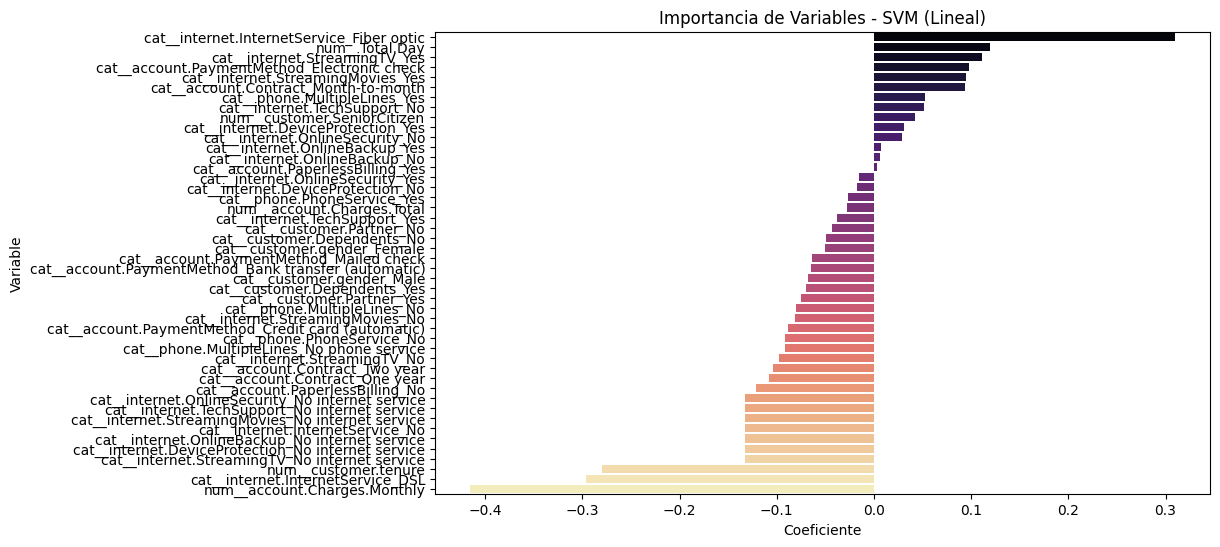

In [401]:
# Acceder al modelo dentro del pipeline
svm_model = modelo_svm.named_steps["svm"]

# Access the coefficients directly for LinearSVC
coef_svm = pd.DataFrame({
    "Variable": preprocessor_scaled.get_feature_names_out(), # Get feature names after preprocessing
    "Coeficiente": svm_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_svm, palette="magma")
plt.title("Importancia de Variables - SVM (Lineal)")
plt.show()

## Creación y Entrenamiento del Modelo SVM

In [402]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Re-definir los preprocesadores para claridad, si es necesario, o usar los existentes.
# Usaremos el preprocessor_scaled que ya creamos para modelos sensibles a escala.
# preprocessor_scaled = modelo_log.named_steps['preprocessor'] # Ya definido en celdas anteriores

# ========================
# Modelo 3: SVM con kernel lineal
# ========================
# Usamos LinearSVC para kernel lineal, es más eficiente para datasets grandes
# Si quieres probar otros kernels, usa SVC(kernel='...')
modelo_svm = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled), # Usamos el preprocesador escalado
    ('svm', LinearSVC(random_state=42, max_iter=10000)) # Modelo SVM lineal
])

# Entrenar el modelo SVM
# Asegúrate de que X_train y y_train estén disponibles desde la celda de split
modelo_svm.fit(X_train, y_train)

print("Modelo SVM entrenado exitosamente.")

Modelo SVM entrenado exitosamente.


## Analisis de Importacioa de Varaiables

### Regresion logistica

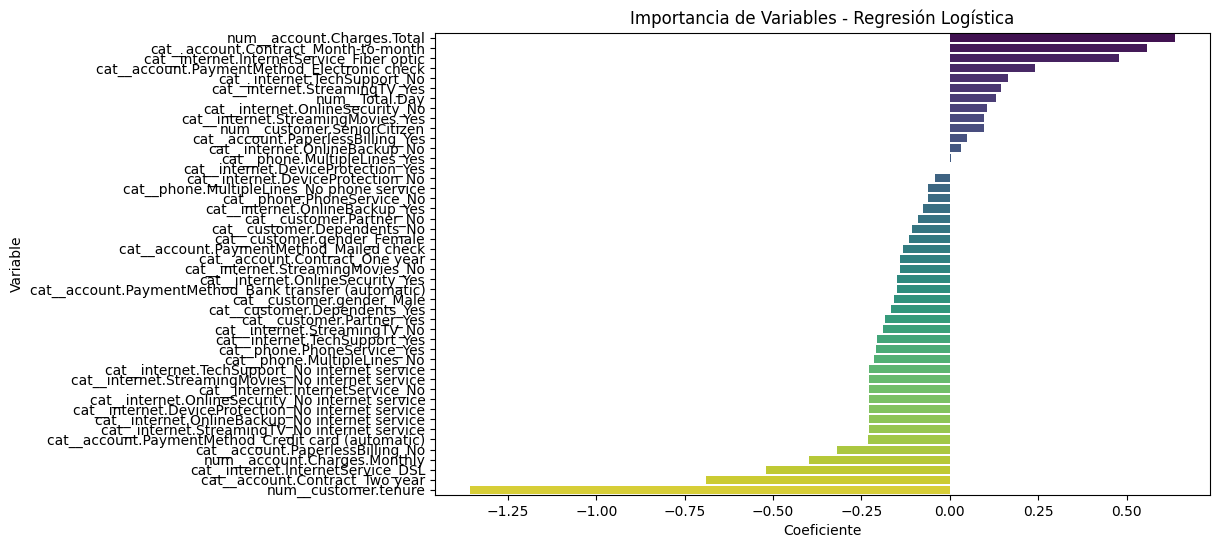

In [403]:
# Accedemos al modelo entrenado dentro del pipeline
log_model = modelo_log.named_steps["logreg"]

# Get feature names after preprocessing
preprocessor_scaled = modelo_log.named_steps['preprocessor']
feature_names = preprocessor_scaled.get_feature_names_out()

# Coeficientes
coef_log = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_log, palette="viridis")
plt.title("Importancia de Variables - Regresión Logística")
plt.show()

### Forest

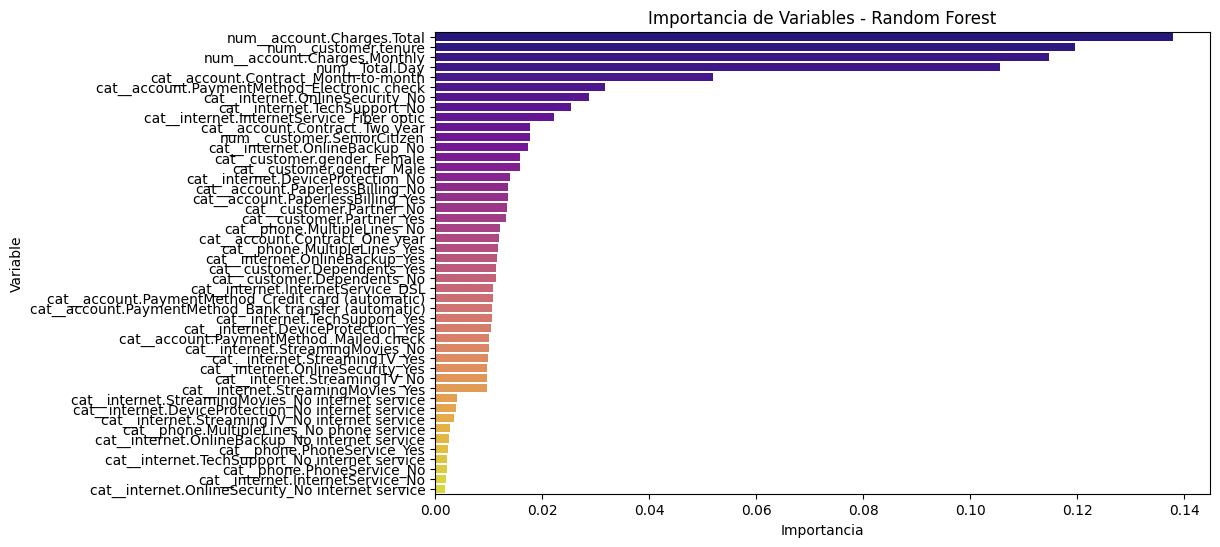

In [404]:
# Importancias de variables
rf_model = modelo_rf.named_steps["rf"]

# Get feature names after preprocessing from the rf pipeline's preprocessor
preprocessor_rf_model = modelo_rf.named_steps['preprocessor']
feature_names_rf = preprocessor_rf_model.get_feature_names_out()

importancias_rf = pd.DataFrame({
    "Variable": feature_names_rf, # Use feature names after preprocessing
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importancias_rf, palette="plasma")
plt.title("Importancia de Variables - Random Forest")
plt.show()

### SVM

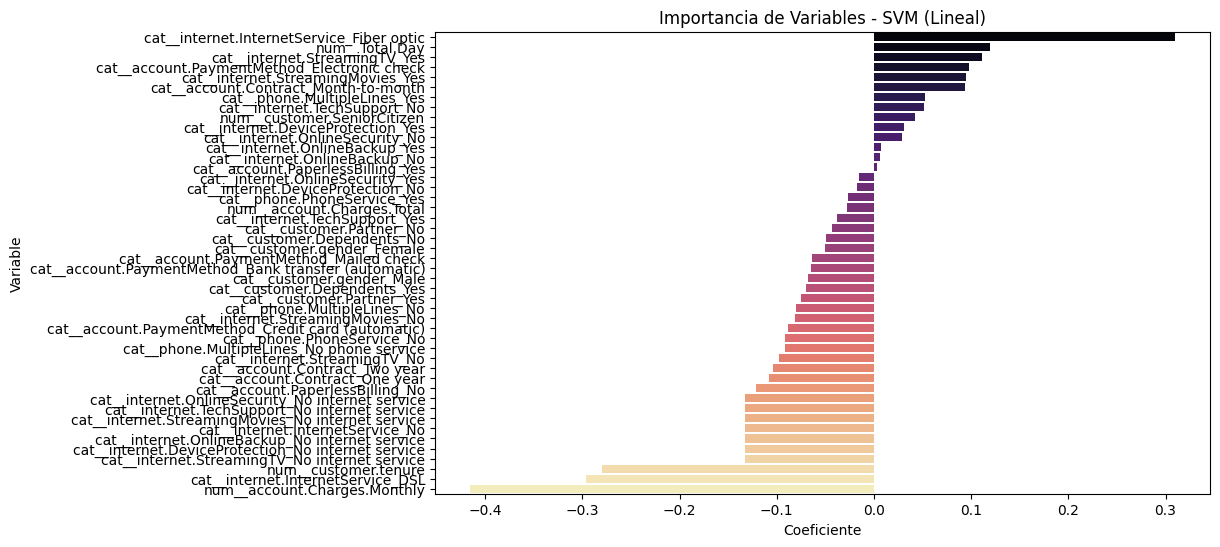

In [405]:
svm_model = modelo_svm.named_steps["svm"]

# Access the coefficients directly for LinearSVC
coef_svm = pd.DataFrame({
    "Variable": preprocessor_scaled.get_feature_names_out(), # Get feature names after preprocessing
    "Coeficiente": svm_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_svm, palette="magma")
plt.title("Importancia de Variables - SVM (Lineal)")
plt.show()

📑 Conclusion
Conclusión

Tras la construcción y evaluación de los modelos predictivos, se identificaron diferencias relevantes en el rendimiento y en la capacidad de interpretación de cada uno:

Rendimiento de los Modelos

La Regresión Logística, tras la normalización de variables, mostró un desempeño aceptable y fácil de interpretar. Los coeficientes permiten entender cómo cada variable incrementa o reduce la probabilidad de cancelación.

El Random Forest presentó un mejor equilibrio entre precisión, recall y F1-score, lo que indica que es más robusto en la clasificación de clientes que cancelan y los que permanecen. Además, este modelo permitió obtener un ranking claro de importancia de variables.

En el caso del SVM con kernel lineal, se obtuvieron resultados intermedios. Si bien fue útil para definir una frontera de decisión, su capacidad explicativa es más limitada que la regresión logística o el bosque aleatorio.

Factores Relevantes en la Cancelación (Churn)

Las variables económicas, como cargos mensuales (Monthly Charges) y cargos totales (Total Charges), fueron las más influyentes en la decisión de cancelar. Clientes con facturas más altas presentan mayor propensión a abandonar el servicio.

La antigüedad del cliente (tenure) también fue un factor determinante. Usuarios con poco tiempo de permanencia resultaron más propensos a cancelar, lo cual sugiere que los primeros meses son críticos para la retención.

Variables demográficas (como género) tuvieron un impacto mínimo en comparación con las variables relacionadas con consumo y facturación.

Interpretación Crítica

El Random Forest se perfila como el modelo más confiable para este problema, ya que logra un mejor equilibrio entre exactitud y capacidad de generalización.

La Regresión Logística, aunque más simple, aporta un valor interpretativo clave, al permitir medir directamente la dirección del efecto de cada variable.

No se observó un sobreajuste evidente en el bosque aleatorio, lo cual refuerza su utilidad práctica.

Estrategias de Retención Propuestas

Diseñar planes personalizados de precios para clientes con cargos mensuales elevados, reduciendo la presión económica.

Implementar programas de fidelización durante los primeros meses, dado que la falta de antigüedad se asocia con mayor propensión a cancelar.

Focalizar los recursos en la atención a clientes con perfiles de alto riesgo identificados por el modelo, priorizando la comunicación proactiva y la solución de problemas tempranos.